<a href="https://colab.research.google.com/github/JMC110/Homework_0/blob/master/ML_Project_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
%matplotlib inline
%precision 3
np.set_printoptions(precision=3)
import pylab as pl

In [0]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [0]:
x1 = np.arange(0,13)
y1 = np.arange(13,0,-1)

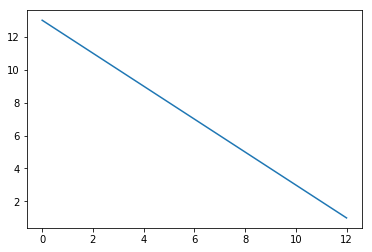

In [0]:
plt.plot(x1,y1)

In [0]:
np.cov([x1,y1])

array([[ 15.167, -15.167],
       [-15.167,  15.167]])

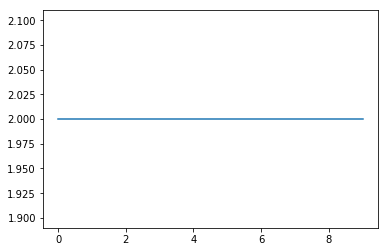

In [0]:
x2 = np.arange(0,10)
y2 = np.array([2]*10)
plt.plot(x2,y2)

In [0]:
cov_mat = np.cov([x2,y2])
cov_mat

array([[9.167, 0.   ],
       [0.   , 0.   ]])

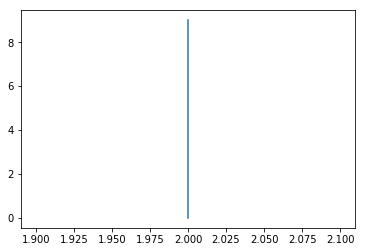

In [0]:
x3 = np.array([2]*10)
y3 = np.arange(0,10)
plt.plot(x3,y3)

In [0]:
np.cov([x3,y3])

array([[0.   , 0.   ],
       [0.   , 9.167]])

In [0]:
wine =load_wine()

In [0]:
wine_df = pd.DataFrame(wine.data,columns=[wine.feature_names])
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [0]:
X = wine.data

In [0]:
X.shape

(178, 13)

In [0]:
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [0]:
M = mean(X.T, axis=1)
print(M)

[1.300e+01 2.336e+00 2.367e+00 1.949e+01 9.974e+01 2.295e+00 2.029e+00
 3.619e-01 1.591e+00 5.058e+00 9.574e-01 2.612e+00 7.469e+02]


In [0]:
# center columns by subtracting column means
C = X - M
print(C)

[[ 1.229e+00 -6.263e-01  6.348e-02 ...  8.255e-02  1.308e+00  3.181e+02]
 [ 1.994e-01 -5.563e-01 -2.265e-01 ...  9.255e-02  7.883e-01  3.031e+02]
 [ 1.594e-01  2.365e-02  3.035e-01 ...  7.255e-02  5.583e-01  4.381e+02]
 ...
 [ 2.694e-01  1.944e+00 -1.065e-01 ... -3.674e-01 -1.052e+00  8.811e+01]
 [ 1.694e-01  2.537e-01  3.483e-03 ... -3.574e-01 -9.917e-01  9.311e+01]
 [ 1.129e+00  1.764e+00  3.735e-01 ... -3.474e-01 -1.012e+00 -1.869e+02]]


In [0]:
# calculate covariance matrix of centered matrix
V = cov(C.T)
print(V)

[[ 6.591e-01  8.561e-02  4.712e-02 -8.411e-01  3.140e+00  1.469e-01
   1.920e-01 -1.575e-02  6.352e-02  1.028e+00 -1.331e-02  4.170e-02
   1.646e+02]
 [ 8.561e-02  1.248e+00  5.028e-02  1.076e+00 -8.708e-01 -2.343e-01
  -4.586e-01  4.073e-02 -1.411e-01  6.448e-01 -1.433e-01 -2.924e-01
  -6.755e+01]
 [ 4.712e-02  5.028e-02  7.526e-02  4.062e-01  1.123e+00  2.215e-02
   3.153e-02  6.358e-03  1.516e-03  1.647e-01 -4.682e-03  7.618e-04
   1.932e+01]
 [-8.411e-01  1.076e+00  4.062e-01  1.115e+01 -3.975e+00 -6.711e-01
  -1.172e+00  1.504e-01 -3.772e-01  1.450e-01 -2.091e-01 -6.562e-01
  -4.634e+02]
 [ 3.140e+00 -8.708e-01  1.123e+00 -3.975e+00  2.040e+02  1.916e+00
   2.793e+00 -4.556e-01  1.933e+00  6.621e+00  1.809e-01  6.693e-01
   1.769e+03]
 [ 1.469e-01 -2.343e-01  2.215e-02 -6.711e-01  1.916e+00  3.917e-01
   5.405e-01 -3.505e-02  2.194e-01 -8.000e-02  6.204e-02  3.110e-01
   9.817e+01]
 [ 1.920e-01 -4.586e-01  3.153e-02 -1.172e+00  2.793e+00  5.405e-01
   9.977e-01 -6.687e-02  3.731e-

In [0]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print("eigen Vectors=\n%s" %vectors)
print(" eigen Values=\n%s" %values)

eigen Vectors=
[[-1.659e-03 -1.203e-03  1.687e-02  1.414e-01 -2.034e-02  1.941e-01
  -9.233e-01  2.848e-01  8.660e-02  8.029e-03  1.565e-02 -1.497e-02
  -2.245e-03]
 [ 6.810e-04 -2.155e-03  1.220e-01  1.604e-01  6.129e-01  7.425e-01
   1.501e-01 -6.467e-02  1.566e-02 -1.109e-02 -6.730e-02 -2.319e-02
  -1.851e-02]
 [-1.949e-04 -4.594e-03  5.199e-02 -9.773e-03 -2.018e-02  4.175e-02
  -4.501e-02 -1.493e-01  7.365e-02 -1.737e-01  1.321e-01  9.540e-01
  -8.680e-02]
 [ 4.671e-03 -2.645e-02  9.386e-01 -3.310e-01 -6.435e-02 -2.407e-02
  -3.153e-02  1.515e-02  2.045e-03  1.940e-03 -5.394e-03 -5.282e-02
   3.554e-03]
 [-1.787e-02 -9.993e-01 -2.978e-02 -5.394e-03  6.149e-03 -1.924e-03
  -1.797e-03 -3.552e-03 -1.964e-03  2.285e-03 -6.209e-04 -3.025e-03
  -4.052e-05]
 [-9.898e-04 -8.780e-04 -4.048e-02 -7.458e-02 -3.152e-01  2.787e-01
   2.019e-02 -1.772e-01  2.557e-01 -2.669e-02 -3.883e-03  8.802e-03
   8.472e-01]
 [-1.567e-03  5.185e-05 -8.544e-02 -1.691e-01 -5.248e-01  4.336e-01
   3.887e-02 -2.4

In [0]:
vectors.shape

(13, 13)

In [0]:
values.shape

(13,)

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(values[i]), vectors[:,i]) for i in range(len(values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
99201.78951748097
172.53526647789144
9.438113703470645
4.991178607641917
1.2288452283714268
0.8410638694551844
0.27897352306605905
0.15138126638308333
0.11209676473742027
0.07170260316211408
0.03757597886619277
0.02107236614937257
0.008203703141775752


In [0]:
tot = sum(values)
var_exp = [(i / tot)*100 for i in sorted(values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp)
print(50 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [99.80912304918975, 0.1735915624705748, 0.009495895755146111, 0.005021735618215142, 0.0012363684687897742, 0.0008462130335248392, 0.00028068145571365607, 0.00015230805328475292, 0.00011278304393008655, 7.214158108199814e-05, 3.78060266512501e-05, 2.1201375460769154e-05, 8.253927880930353e-06]
--------------------------------------------------
Cumulative variance captured as we travel each component 
 [ 99.809  99.983  99.992  99.997  99.998  99.999 100.    100.    100.
 100.    100.    100.    100.   ]


In [0]:
import pprint
print ("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(13,1),
                      eig_pairs[1][1].reshape(13,1)))

print ('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(99201.78951748097,
  array([-1.659e-03,  6.810e-04, -1.949e-04,  4.671e-03, -1.787e-02,
       -9.898e-04, -1.567e-03,  1.231e-04, -6.006e-04, -2.327e-03,
       -1.714e-04, -7.049e-04, -9.998e-01])),
 (172.53526647789144,
  array([-1.203e-03, -2.155e-03, -4.594e-03, -2.645e-02, -9.993e-01,
       -8.780e-04,  5.185e-05,  1.354e-03, -5.004e-03, -1.510e-02,
        7.627e-04,  3.495e-03,  1.777e-02])),
 (9.438113703470645,
  array([ 0.017,  0.122,  0.052,  0.939, -0.03 , -0.04 , -0.085,  0.014,
       -0.025,  0.291, -0.026, -0.07 ,  0.005])),
 (4.991178607641917,
  array([ 0.141,  0.16 , -0.01 , -0.331, -0.005, -0.075, -0.169,  0.011,
       -0.05 ,  0.879, -0.06 , -0.178, -0.003])),
 (1.2288452283714268,
  array([-0.02 ,  0.613, -0.02 , -0.064,  0.006, -0.315, -0.525,  0.03 ,
       -0.251, -0.332, -0.052, -0.261,  0.002])),
 (0.8410638694551844,
  array([ 0.194,  0.742,  0.042, -0.024, -0.002,  0.279,  0.434, -0.022,
        0.242,  0.003, 

In [0]:
Y = C.dot(matrix_w)
print (Y[0:8])

[[-3.186e+02 -2.149e+01]
 [-3.031e+02  5.365e+00]
 [-4.381e+02  6.537e+00]
 [-7.332e+02 -1.927e-01]
 [ 1.157e+01 -1.849e+01]
 [-7.032e+02  3.322e-01]
 [-5.430e+02  1.352e+01]
 [-5.484e+02 -1.145e+01]]


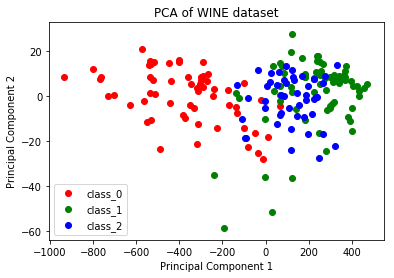

In [0]:
pl.figure()
target_names = wine.target_names
y = wine.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    pl.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('PCA of WINE dataset')
pl.show()